# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL


query_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

print(query_url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=e37ca5b8514fde4ac9a07d50be62aef9
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lere
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | verkhniye tatyshly
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | yarmouth
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | cova figueira
Processing Record 13 of Set 1 | debre tabor
Processing Record 14 of Set 1 | tolanaro
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | aberglasslyn
Processing Record 17 of Set 1 | kaliua
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | sapu padidu
Processing Record 20 of Set 1 | saint-

Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | luganville
Processing Record 41 of Set 4 | ubauro
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | ulladulla
Processing Record 44 of Set 4 | qusmuryn
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | hilo
Processing Record 48 of Set 4 | turpan
Processing Record 49 of Set 4 | nouadhibou
Processing Record 0 of Set 5 | susuman
Processing Record 1 of Set 5 | belogorsk
Processing Record 2 of Set 5 | west island
Processing Record 3 of Set 5 | port douglas
Processing Record 4 of Set 5 | paranhos
Processing Record 5 of Set 5 | nova vicosa
Processing Record 6 of Set 5 | manay
Processing Record 7 of Set 5 | moussoro
Processing Record 8 of Set 5 | nguruka
Processing Record 9 of Set 5 | fort st. john
Processing Record 10 of Set 5 | baki
Processing Record 11 of Set 5 | hamilton
Processing Record 12 of Set 5 | benalla
Processin

Processing Record 31 of Set 8 | san antonio de pale
Processing Record 32 of Set 8 | debre birhan
Processing Record 33 of Set 8 | jimaguayu
City not found. Skipping...
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | belaya kholunitsa
Processing Record 36 of Set 8 | manati
Processing Record 37 of Set 8 | sretensk
Processing Record 38 of Set 8 | lezignan-corbieres
Processing Record 39 of Set 8 | darwin
Processing Record 40 of Set 8 | mogocha
Processing Record 41 of Set 8 | richmond hill
Processing Record 42 of Set 8 | namtsy
Processing Record 43 of Set 8 | gobabis
Processing Record 44 of Set 8 | labuan lombok
City not found. Skipping...
Processing Record 45 of Set 8 | rouissat
Processing Record 46 of Set 8 | sarikei
Processing Record 47 of Set 8 | vangaindrano
Processing Record 48 of Set 8 | middelburg
Processing Record 49 of Set 8 | saratamata
City not found. Skipping...
Processing Record 0 of Set 9 | olinda
Processing Record 1 of Set 9 | greymouth
Processing Re

Processing Record 17 of Set 12 | erdenet
Processing Record 18 of Set 12 | sittwe
Processing Record 19 of Set 12 | taft
Processing Record 20 of Set 12 | hasaki
Processing Record 21 of Set 12 | san matias
Processing Record 22 of Set 12 | wafangdian
Processing Record 23 of Set 12 | bagepalli
Processing Record 24 of Set 12 | icano
Processing Record 25 of Set 12 | yucca valley
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | mangai
Processing Record 28 of Set 12 | wagga wagga
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | kehychivka
Processing Record 31 of Set 12 | forst
Processing Record 32 of Set 12 | ingeniero jacobacci
Processing Record 33 of Set 12 | kentville
Processing Record 34 of Set 12 | heroica guaymas
Processing Record 35 of Set 12 | aljezur
Processing Record 36 of Set 12 | puerto real
Processing Record 37 of Set 12 | teluknaga
Processing Record 38 of Set 12 | blenheim
Processing Record 39 of Set 12 | shangrao
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lere,10.3870,8.5726,22.75,24,23,3.86,NG,1706647970
1,iskateley,67.6803,53.1512,-6.16,93,76,4.59,RU,1706647970
2,thompson,55.7435,-97.8558,4.09,75,75,3.60,CA,1706647970
3,verkhniye tatyshly,56.2912,55.8575,-4.28,97,100,2.65,RU,1706647970
4,tura,25.5198,90.2201,13.04,50,0,1.65,IN,1706647970


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lere,10.3870,8.5726,22.75,24,23,3.86,NG,1706647970
1,iskateley,67.6803,53.1512,-6.16,93,76,4.59,RU,1706647970
2,thompson,55.7435,-97.8558,4.09,75,75,3.60,CA,1706647970
3,verkhniye tatyshly,56.2912,55.8575,-4.28,97,100,2.65,RU,1706647970
4,tura,25.5198,90.2201,13.04,50,0,1.65,IN,1706647970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

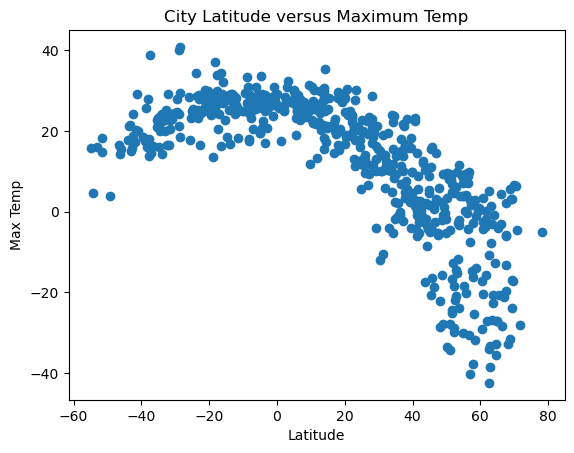

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
plt.scatter(lat, max_temp)

# Incorporate the other graph properties
plt.title("City Latitude versus Maximum Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

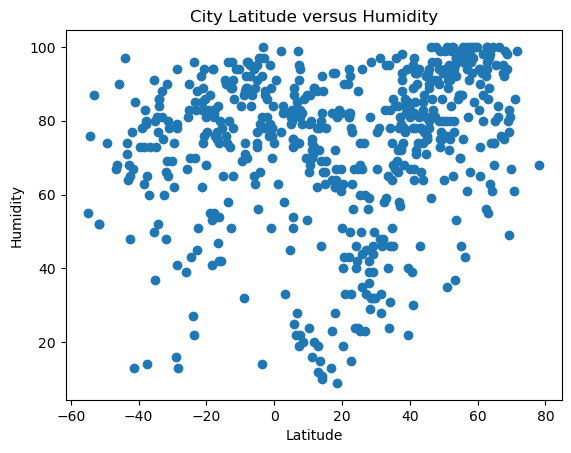

In [9]:
# Build the scatter plots for latitude vs. humidity

humidity = city_data_df["Humidity"]
plt.scatter(lat, humidity)

# Incorporate the other graph properties
plt.title("City Latitude versus Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

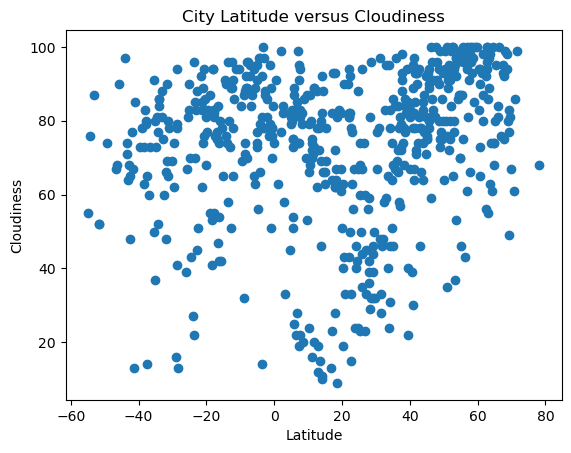

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lat, humidity)
# Incorporate the other graph properties
plt.title("City Latitude versus Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

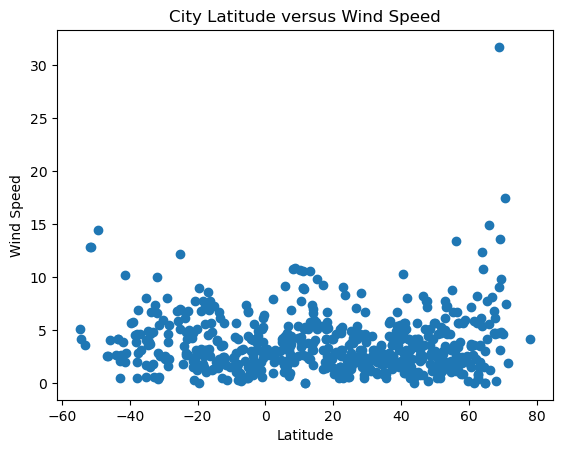

In [11]:
# Build the scatter plots for latitude vs. wind speed
windspeed = city_data_df["Wind Speed"]
plt.scatter(lat, windspeed)

# Incorporate the other graph properties
plt.title("City Latitude versus Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    plt.show

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"])>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lere,10.3870,8.5726,22.75,24,23,3.86,NG,1706647970
1,iskateley,67.6803,53.1512,-6.16,93,76,4.59,RU,1706647970
2,thompson,55.7435,-97.8558,4.09,75,75,3.60,CA,1706647970
3,verkhniye tatyshly,56.2912,55.8575,-4.28,97,100,2.65,RU,1706647970
4,tura,25.5198,90.2201,13.04,50,0,1.65,IN,1706647970


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"])<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,3.82,74,82,14.47,TF,1706647971
7,ushuaia,-54.8000,-68.3000,15.81,55,75,5.14,AR,1706647971
8,waitangi,-43.9535,-176.5597,17.68,97,100,2.68,NZ,1706647971
10,blackmans bay,-43.0167,147.3167,15.07,64,100,0.45,AU,1706647971
13,tolanaro,-25.0319,46.9987,25.04,83,40,5.14,MG,1706647971


###  Temperature vs. Latitude Linear Regression Plot

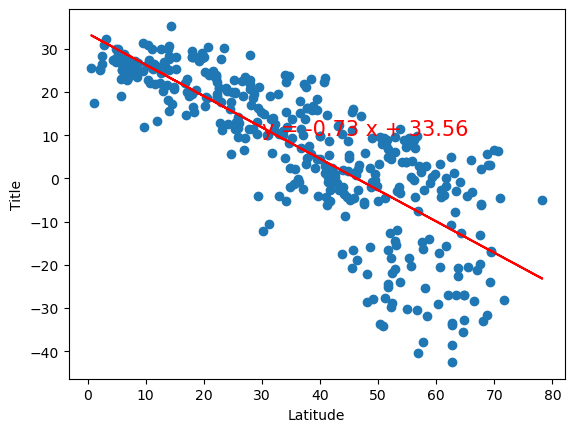

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temperature", (30,10))

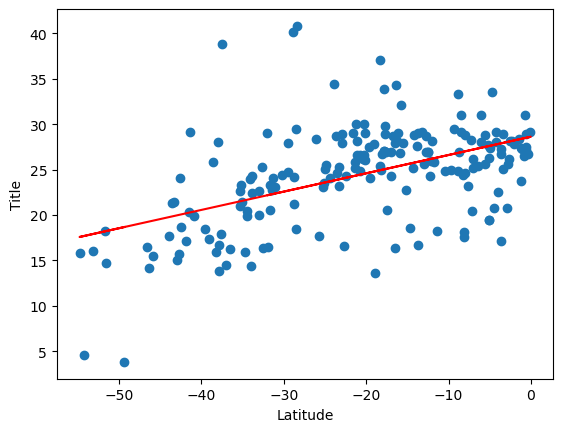

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temperature", (30,10))

**Discussion about the linear relationship:  Lower Latitudes have lower temperatures in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

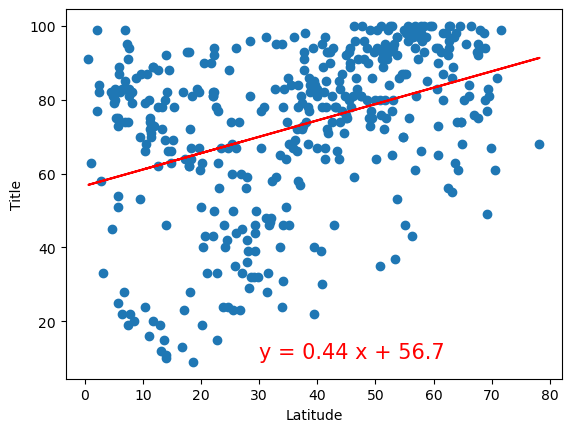

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (30,10))

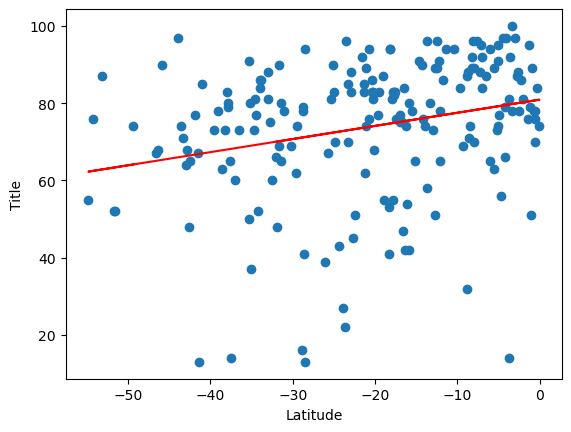

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (30,10))

**Discussion about the linear relationship:** I don't see any strong correlation between humidity and latitude.  

### Cloudiness vs. Latitude Linear Regression Plot

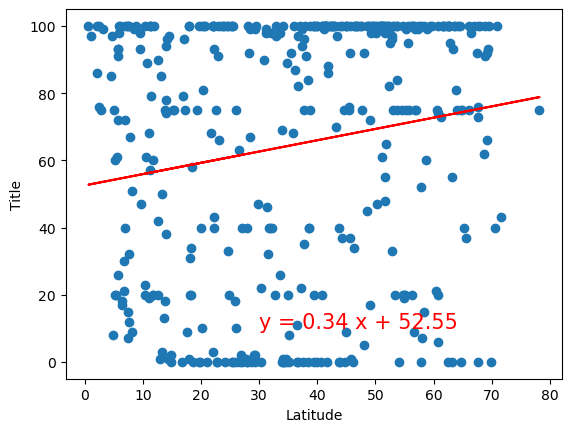

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (30,10))

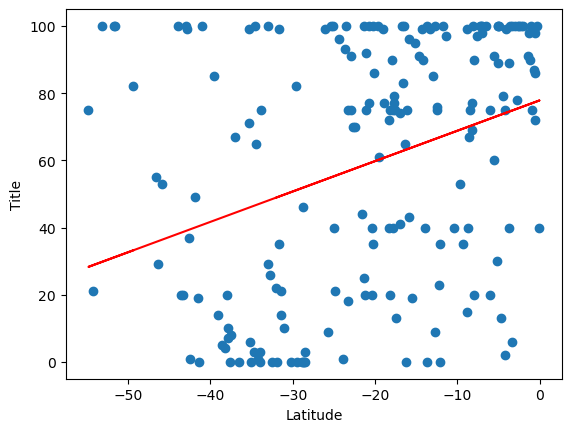

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (30,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

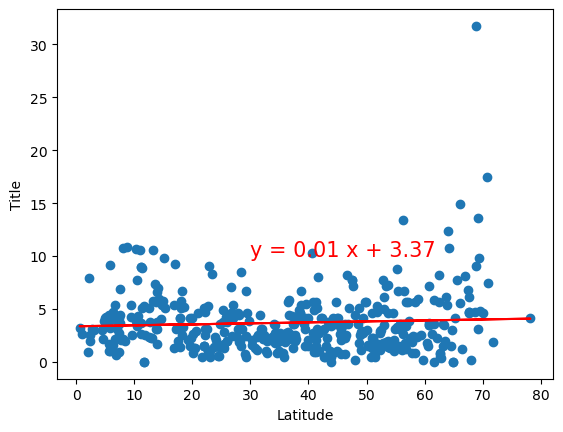

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Cloudiness", (30,10))

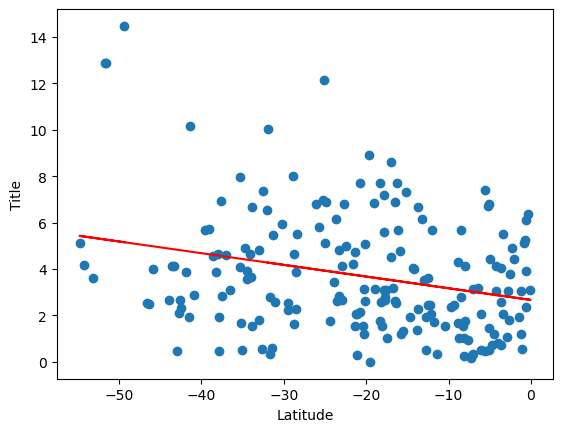

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (30,10))

**Discussion about the linear relationship:** In the Northern Hemisphere, wind speed is constant no matter the latitude.  In the Southern Hemisphere, the higher the latitude, the lower the wind speed.